In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_df=pd.read_csv('day (1).csv')

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_df.shape

(730, 16)

In [7]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
pd.DataFrame(bike_df['workingday'].value_counts())

,workingday
1,504
0,226


- The day which is neither weekend nor holiday is 1, other is 0

- As we see that 'Instant' is similar to index so I have to drop it
- We see dteday is having similar data like yr and mnth and after watching the data carefully we  can see that
- casual and registered are equal to cnt and cnt is our target variable so have also to drop casual and registered

In [9]:
bike_df.drop('instant',axis=1,inplace=True)

In [10]:
bike_df.drop('dteday',axis=1,inplace=True)

In [11]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# now I have to drop 'casual' and 'registered'
bike_df.drop(['casual','registered'],axis=1,inplace=True)

In [13]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Now we have a clear data through which we have to create a model

In [15]:
# now we will replace sesons into its category


In [16]:
bike_df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace=True)

In [17]:
bike_df.sample(6)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
327,winter,0,11,1,6,0,1,15.306653,18.62355,54.9167,11.209368,1495
621,fall,1,9,0,6,0,1,25.966653,29.70415,67.2500,6.958821,8009
233,fall,0,8,0,3,1,1,28.358347,31.91270,47.0000,18.542250,4758
87,summer,0,3,0,4,1,1,12.402500,14.64540,31.4167,15.208732,2425
509,summer,1,5,0,6,0,1,27.880000,31.37645,74.7083,9.416850,6734
546,fall,1,7,0,1,1,1,33.449153,37.53145,51.8750,11.291443,5531


In [18]:
bike_df['weathersit'].replace({1:'Clear_Partly_cloudy',2:'Mist_Cloudy',3:'Light_Rain_Thunderstorm_Scattered clouds',
4:'Rain_Thunderstorm_Mist_Snow'},inplace=True)

In [19]:
bike_df.sample(6)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
136,summer,0,5,0,4,1,Mist_Cloudy,23.028347,26.92645,83.7917,18.582718,4123
552,fall,1,7,0,0,0,Clear_Partly_cloudy,35.328347,40.24565,49.2083,10.958118,4840
148,summer,0,5,0,2,1,Clear_Partly_cloudy,27.367500,30.77750,81.8750,14.333846,4788
47,spring,0,2,0,6,0,Clear_Partly_cloudy,17.869153,21.43290,50.5000,15.416968,2475
94,summer,0,4,0,4,1,Mist_Cloudy,16.980847,19.91750,64.2083,26.000489,1795
57,spring,0,2,0,2,1,Clear_Partly_cloudy,14.082598,17.55545,68.0000,8.391616,2402


In [20]:
bike_df['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday'},inplace=True)

In [21]:
bike_df.sample(6)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
133,summer,0,5,0,Monday,1,Mist_Cloudy,21.354153,25.03145,92.2500,9.041650,3409
424,spring,1,3,0,Friday,1,Clear_Partly_cloudy,19.919153,23.76855,61.5417,15.208129,4990
21,spring,0,1,0,Monday,1,Clear_Partly_cloudy,2.424346,3.95348,40.0000,11.521990,981
365,spring,1,1,0,Tuesday,1,Clear_Partly_cloudy,15.170000,18.78105,69.2500,12.875189,2294
226,fall,0,8,0,Wednesday,1,Clear_Partly_cloudy,27.299153,30.80835,71.2083,13.999918,4338
398,spring,1,2,0,Sunday,0,Clear_Partly_cloudy,12.846653,15.46730,52.6667,11.959232,4151


In [22]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [23]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [24]:
# now I have to convert integer into a apprpriate datatype
bike_df[['temp','atemp','hum','windspeed','cnt']]=bike_df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [25]:
bike_df.sample(6)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
562,fall,1,7,0,Wednesday,1,Clear_Partly_cloudy,33.551653,37.78415,50.5833,7.666743,6786
534,summer,1,6,0,Wednesday,1,Clear_Partly_cloudy,28.221653,32.73460,69.0000,9.917139,6825
239,fall,0,8,0,Tuesday,1,Clear_Partly_cloudy,28.989419,32.39795,56.1765,20.412153,4334
617,fall,1,9,0,Tuesday,1,Clear_Partly_cloudy,23.916653,28.28270,50.3750,17.333771,7525
688,winter,1,11,0,Wednesday,1,Mist_Cloudy,15.340847,19.03335,68.5000,5.542575,5634
245,fall,0,9,0,Monday,1,Clear_Partly_cloudy,27.435847,31.66065,71.6667,12.416775,4484


<Figure size 576x432 with 0 Axes>

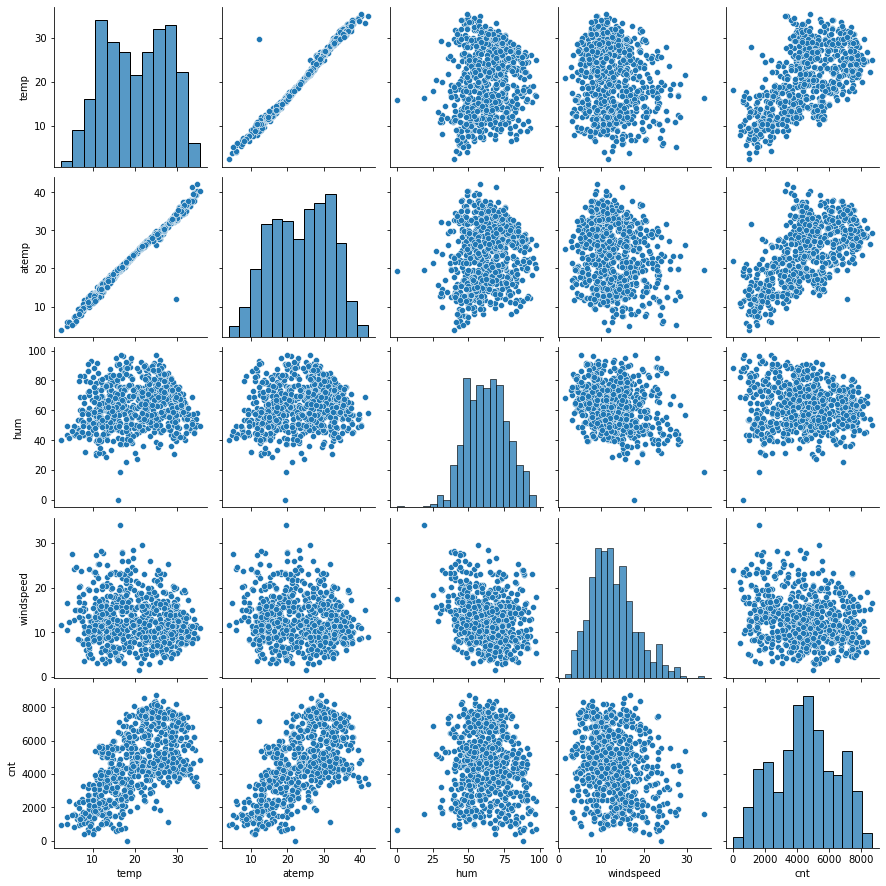

In [26]:
plt.figure(figsize=[8,6]);
sns.pairplot(data=bike_df,vars=['temp','atemp','hum','windspeed','cnt']);

- Here in the above plot we can see that temp and atemp are having good relationship to eachother

In [27]:
corr=bike_df.corr()

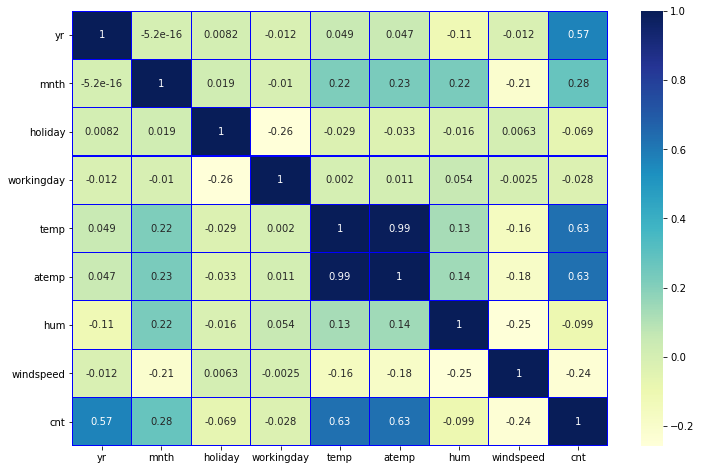

In [28]:
plt.figure(figsize=[12,8])
sns.heatmap(corr,annot=True,linewidths=0.3,linecolor='b',cmap="YlGnBu");

- corelation between temp and atemp is 0.99 which is highhy corelated approx 1
- sowe can drop temp

In [29]:
bike_df.drop('temp',axis=1,inplace=True)

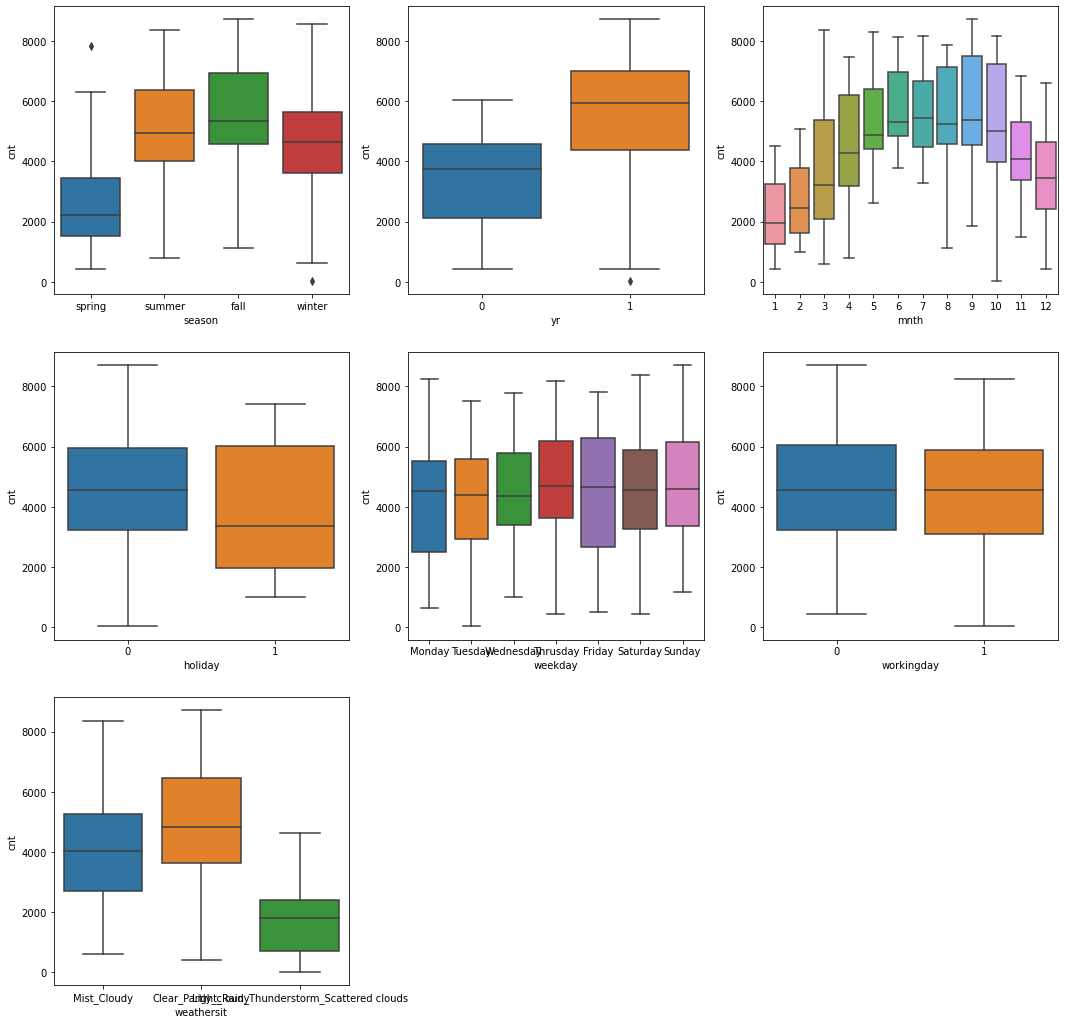

In [30]:
# lets undestood the categorical data using boxplot
plt.figure(figsize=[18,18])
plt.subplot (3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_df);
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_df);
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_df);
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike_df);
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike_df);
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike_df);
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_df);


$ From your analysis of the categorical variables from the dataset, what could you infer about theireffect on the dependent variable?Number of bikes rented is high:$
-  1.Season- Fall is the Top season where the number of bikes rented is high 
-  2.Weather- The number of bikes rented is high when the weather is clear , few clouds
-  3.Weekdays-The number of bikes rented goes high during mid week.
-  4.Month-The number of bikes rented goes high during mid year.

In [31]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [32]:
#let's convert the variable into object type
bike_df['season']=bike_df['season'].astype(object)
bike_df['mnth']=bike_df['mnth'].astype(object)
bike_df['weekday']=bike_df['weekday'].astype(object)
bike_df['weathersit']=bike_df['weathersit'].astype(object)

In [33]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [34]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Partly_cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thrusday,1,Clear_Partly_cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Partly_cloudy,11.46350,43.6957,12.522300,1600


In [35]:
pd.DataFrame(bike_df['season'].value_counts())

,season
fall,188
summer,184
spring,180
winter,178


In [36]:
pd.DataFrame(bike_df['mnth'].value_counts(),)

,mnth
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60
9,60


In [37]:
bike_df['weekday'].value_counts()

Monday       105
Tuesday      105
Wednesday    104
Sunday       104
Thrusday     104
Friday       104
Saturday     104
Name: weekday, dtype: int64

In [38]:
bike_df['weathersit'].value_counts()

Clear_Partly_cloudy                         463
Mist_Cloudy                                 246
Light_Rain_Thunderstorm_Scattered clouds     21
Name: weathersit, dtype: int64

In [39]:
# create a dummy variable for categorical columns
df_season=pd.get_dummies(bike_df['season'],drop_first=True)
df_month=pd.get_dummies(bike_df['mnth'],drop_first=True)
df_weather=pd.get_dummies(bike_df['weathersit'],drop_first=True)
df_weekday=pd.get_dummies(bike_df['weekday'],drop_first=True)


In [40]:
bike_df=pd.concat([bike_df,df_season],axis=1)
bike_df=pd.concat([bike_df,df_month],axis=1)
bike_df=pd.concat([bike_df,df_weather],axis=1)
bike_df=pd.concat([bike_df,df_weekday],axis=1)

In [41]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,11,12,Light_Rain_Thunderstorm_Scattered clouds,Mist_Cloudy,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,spring,0,1,0,Monday,1,Mist_Cloudy,18.18125,80.5833,10.749882,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,1,0,Tuesday,1,Mist_Cloudy,17.68695,69.6087,16.652113,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,1,0,Wednesday,1,Clear_Partly_cloudy,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,1,0,Thrusday,1,Clear_Partly_cloudy,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,1,0,Friday,1,Clear_Partly_cloudy,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [42]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   season                                    730 non-null    object 
 1   yr                                        730 non-null    int64  
 2   mnth                                      730 non-null    object 
 3   holiday                                   730 non-null    int64  
 4   weekday                                   730 non-null    object 
 5   workingday                                730 non-null    int64  
 6   weathersit                                730 non-null    object 
 7   atemp                                     730 non-null    float64
 8   hum                                       730 non-null    float64
 9   windspeed                                 730 non-null    float64
 10  cnt                                   

In [43]:
# now let's drop original data which is of no use
bike_df.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)

In [44]:
bike_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Light_Rain_Thunderstorm_Scattered clouds,Mist_Cloudy,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


- now I have a clear data on which we'll perform our linear Regression model
- now I'll split the data into train and test 

In [45]:
np.random.seed(0)
df_train,df_test=train_test_split(bike_df,train_size=0.7,random_state=100)

In [46]:
df_train.shape

(510, 29)

In [47]:
df_test.shape

(220, 29)

### Rescaling the Features
#### As we saw in the demonstration for Simple Linear Regression, scaling doesn't impact our model. Here we can see that except    for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)
- This time, we will use MinMax scaling.

In [48]:
scaler=MinMaxScaler()
num_vars=['atemp','hum','windspeed','cnt']# scaling only numerical value except the columns which having 0 and 1
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [49]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Light_Rain_Thunderstorm_Scattered clouds,Mist_Cloudy,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,1,0,0,0
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [50]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Light_Rain_Thunderstorm_Scattered clouds,Mist_Cloudy,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.086275,0.084314,0.029412,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.281045,0.278131,0.169124,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-  here in above data we can see that max is 1 and min is 0

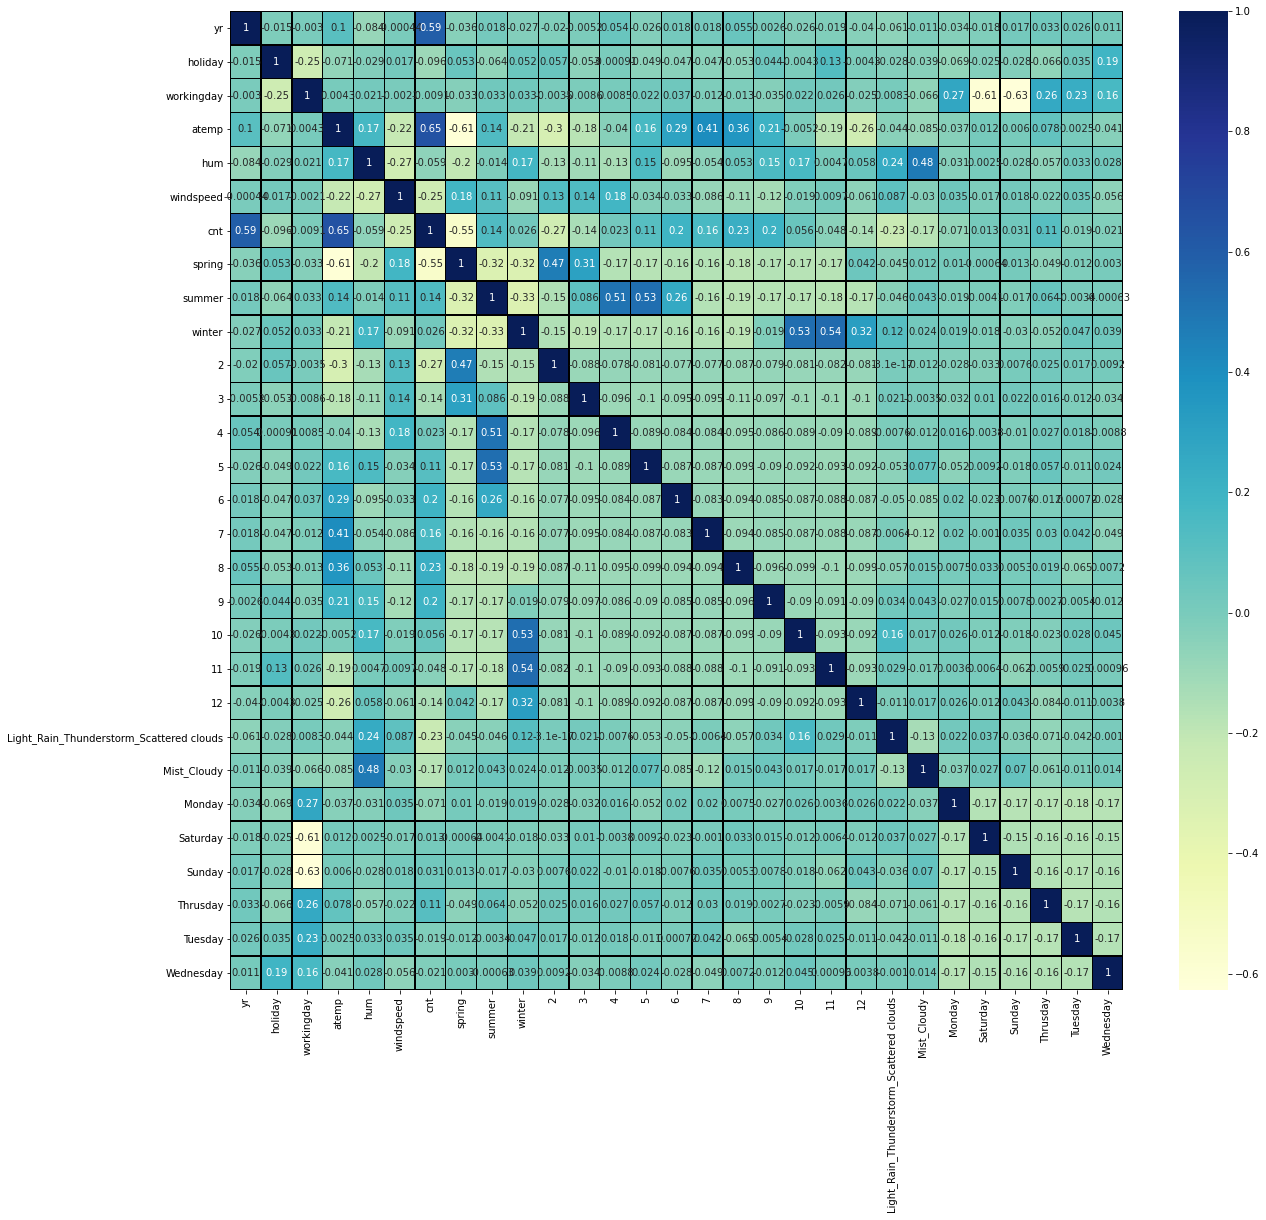

In [51]:
# let's see the data which are highly corelated to each other
plt.figure(figsize=[20,18])
sns.heatmap(df_train.corr(),annot=True,linecolor='black',linewidths=0.3,cmap="YlGnBu");

- as we see cnt and atemp and yr are highly corelated i.e.0.65 and0.59 and workingday is less corelated

### so we plot a pairplot for cnt and atemp

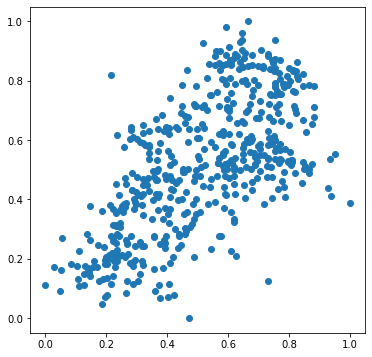

In [52]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp,df_train.cnt);

### Dividing into X and Y sets for the model building
- let's pop cnt from df_train dataframe

In [53]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Light_Rain_Thunderstorm_Scattered clouds,Mist_Cloudy,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,1,0,0,0
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [54]:
y_train=df_train.pop('cnt')
x_train=df_train

In [55]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [56]:
x_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,2,...,11,12,Light_Rain_Thunderstorm_Scattered clouds,Mist_Cloudy,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
111,0,0,0,0.318819,0.751824,0.380981,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


## building a linear model 
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [57]:
x_train_sm=sm.add_constant(x_train[['atemp']])

In [58]:
x_train_sm.head()

,const,atemp
576,1.0,0.766351
426,1.0,0.438975
728,1.0,0.200348
482,1.0,0.391735
111,1.0,0.318819


In [59]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [60]:

#create first fit model
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           4.77e-62
Time:                        23:33:51   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- here the model shows r-squared is0.420 and adj R-squared is approx same
- coefficient value for atemp is 0.68 and constant is 0.16

### Adding another variable to see if there is any change in r-squared occur or not

In [61]:
x_train_sm=sm.add_constant(x_train[['atemp','hum','windspeed']])
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     152.8
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           1.67e-70
Time:                        23:33:52   Log-Likelihood:                 203.38
No. Observations:                 510   AIC:                            -398.8
Df Residuals:                     506   BIC:                            -381.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4493      0.044     10.309      0.000       0.364       0.535
atemp          0.6840      0.035     19.496      0.000       0.615       0.753
hum           -0.3294      0.052     -6.362      0.000      -0.431      -0.228
windspeed     -0.2260      0.045     -5.034      0.000      -0.314      -0.138
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.360
Skew:                           0.091   Prob(JB):                        0.507
Kurtosis:                       2.824   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We see that there is an increase in the R-squared value and p-value remain 0 for all the three variable
- Here we see that hum and windspeed is relativel having less coefficient relationship 
- Standard error for hum is >.05

In [62]:
x_train.columns.shape

(28,)

In [63]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.params

const                                       0.339704
yr                                          0.232972
holiday                                    -0.133741
workingday                                 -0.065747
atemp                                       0.410423
hum                                        -0.151879
windspeed                                  -0.164877
spring                                     -0.047412
summer                                      0.038182
winter                                      0.106667
2                                           0.029378
3                                           0.073690
4                                           0.074812
5                                           0.111218
6                                           0.102864
7                                           0.065594
8                                           0.123545
9                                           0.175187
10                                          0.

In [64]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.81
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          4.50e-177
Time:                        23:33:52   Log-Likelihood:                 519.23
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     481   BIC:                            -857.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.3397      0.084      4.038      0.000       0.174       0.505
yr                                           0.2330      0.008     28.480      0.000       0.217       0.249
holiday                                     -0.1337      0.066     -2.028      0.043      -0.263      -0.004
workingday                                  -0.0657      0.072     -0.918      0.359      -0.207       0.075
atemp                                        0.4104      0.046      8.958      0.000       0.320       0.500
hum                                         -0.1519      0.039     -3.878      0.000      -0.229      -0.075
windspeed                                   -0.1649      0.026     -6.279      0.000      -0.216      -0.113
spring                                      -0.0474      0.030     -1.560      0.120      -0.107       0.012
summer                                       0.0382      0.026      1.443      0.150      -0.014       0.090
winter                                       0.1067      0.028      3.761      0.000       0.051       0.162
2                                            0.0294      0.021      1.404      0.161      -0.012       0.071
3                                            0.0737      0.023      3.272      0.001       0.029       0.118
4                                            0.0748      0.034      2.206      0.028       0.008       0.141
5                                            0.1112      0.036      3.097      0.002       0.041       0.182
6                                            0.1029      0.038      2.702      0.007       0.028       0.178
7                                            0.0656      0.043      1.511      0.131      -0.020       0.151
8                                            0.1235      0.041      3.006      0.003       0.043       0.204
9                                            0.1752      0.037      4.693      0.000       0.102       0.249
10                                           0.0804      0.035      2.305      0.022       0.012       0.149
11                                           0.0292      0.033      0.873      0.383      -0.036       0.095
12                                           0.0218      0.027      0.809      0.419      -0.031       0.075
Light_Rain_Thunderstorm_Scattered clouds    -0.2478      0.027     -9.211      0.000      -0.301      -0.195
Mist_Cloudy                                 -0.0594      0.011     -5.608      0.000      -0.080      -0.039
Monday                                      -0.0258      0.015     -1.756      0.080      -0.055       0.003
Saturday                                    -0.0580      0.072     -0.804      0.422      -0.200       0.084
Sunday                         

- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

- Maybe we could drop some?

- We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

## checking vif for the variables

### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [65]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,59.82
3,atemp,40.24
4,hum,39.75
6,spring,12.27
8,winter,12.08
24,Sunday,11.53
23,Saturday,11.07
7,summer,10.36
15,8,9.67
14,7,8.63


In [66]:
from sklearn.feature_selection import RFE

In [67]:
lm=LinearRegression()
lm.fit(x_train,y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

In [68]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 12),
 ('Light_Rain_Thunderstorm_Scattered clouds', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thrusday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13)]

In [69]:
col=x_train.columns[rfe.support_]#top 15 variables
col

Index([                                      'yr',
                                        'holiday',
                                          'atemp',
                                            'hum',
                                      'windspeed',
                                         'spring',
                                         'winter',
                                                3,
                                                4,
                                                5,
                                                6,
                                                8,
                                                9,
       'Light_Rain_Thunderstorm_Scattered clouds',
                                    'Mist_Cloudy'],
      dtype='object')

In [70]:
x_train.columns[~rfe.support_]

Index(['workingday',     'summer',            2,            7,           10,
                 11,           12,     'Monday',   'Saturday',     'Sunday',
         'Thrusday',    'Tuesday',  'Wednesday'],
      dtype='object')

In [71]:
## Building models using statsmodel for the detailed statistics
x_train_rfe=x_train[col]
# adding a constant variable
x_train_rfe1=sm.add_constant(x_train_rfe)
lm=sm.OLS(y_train,x_train_rfe1)
lm_model=lm.fit()
lm_model.params


const                                       0.301137
yr                                          0.232178
holiday                                    -0.083833
atemp                                       0.456317
hum                                        -0.160244
windspeed                                  -0.160998
spring                                     -0.077057
winter                                      0.100394
3                                           0.058380
4                                           0.058440
5                                           0.091986
6                                           0.062876
8                                           0.061079
9                                           0.117810
Light_Rain_Thunderstorm_Scattered clouds   -0.234733
Mist_Cloudy                                -0.055202
dtype: float64

In [72]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.53e-185
Time:                        23:33:57   Log-Likelihood:                 506.37
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     494   BIC:                            -913.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.3011      0.034      8.958      0.000       0.235       0.367
yr                                           0.2322      0.008     28.276      0.000       0.216       0.248
holiday                                     -0.0838      0.026     -3.239      0.001      -0.135      -0.033
atemp                                        0.4563      0.033     13.659      0.000       0.391       0.522
hum                                         -0.1602      0.038     -4.162      0.000      -0.236      -0.085
windspeed                                   -0.1610      0.026     -6.153      0.000      -0.212      -0.110
spring                                      -0.0771      0.019     -4.131      0.000      -0.114      -0.040
winter                                       0.1004      0.016      6.168      0.000       0.068       0.132
3                                            0.0584      0.015      3.843      0.000       0.029       0.088
4                                            0.0584      0.020      2.914      0.004       0.019       0.098
5                                            0.0920      0.019      4.890      0.000       0.055       0.129
6                                            0.0629      0.019      3.276      0.001       0.025       0.101
8                                            0.0611      0.018      3.376      0.001       0.026       0.097
9                                            0.1178      0.017      6.732      0.000       0.083       0.152
Light_Rain_Thunderstorm_Scattered clouds    -0.2347      0.027     -8.784      0.000      -0.287      -0.182
Mist_Cloudy                                 -0.0552      0.011     -5.208      0.000      -0.076      -0.034
==============================================================================
Omnibus:                       60.490   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.402
Skew:                          -0.591   Prob(JB):                     1.48e-35
Kurtosis:                       5.481   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As we have seen RFE 
### calculate the VIF for the same model and see what's happened

In [73]:
vif=pd.DataFrame()
x=x_train_rfe
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,25.74
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.20
14,Mist_Cloudy,2.26
0,yr,2.08
11,8,1.90
9,5,1.77
8,4,1.68


### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.
- Here we see Hum hasVIF>5 hence I have to drop hum and A temp one by one

In [74]:
x_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,spring,winter,3,4,5,6,8,9,Light_Rain_Thunderstorm_Scattered clouds,Mist_Cloudy
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,1,0,0,0,0,0,0,1
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,0,0,0,0,1
111,0,0,0.318819,0.751824,0.380981,0,0,0,1,0,0,0,0,0,1


In [75]:
x_train_rfe=x_train_rfe.drop(['hum'],axis=1)

In [76]:
x_train_rfe1=sm.add_constant(x_train_rfe)
lm1=sm.OLS(y_train,x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.3
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          5.37e-183
Time:                        23:33:58   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     495   BIC:                            -901.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2167      0.027      7.954      0.000       0.163       0.270
yr                                           0.2357      0.008     28.387      0.000       0.219       0.252
holiday                                     -0.0847      0.026     -3.220      0.001      -0.136      -0.033
atemp                                        0.4262      0.033     12.857      0.000       0.361       0.491
windspeed                                   -0.1328      0.026     -5.169      0.000      -0.183      -0.082
spring                                      -0.0829      0.019     -4.384      0.000      -0.120      -0.046
winter                                       0.0890      0.016      5.459      0.000       0.057       0.121
3                                            0.0596      0.015      3.862      0.000       0.029       0.090
4                                            0.0590      0.020      2.894      0.004       0.019       0.099
5                                            0.0814      0.019      4.298      0.000       0.044       0.119
6                                            0.0675      0.019      3.469      0.001       0.029       0.106
8                                            0.0597      0.018      3.249      0.001       0.024       0.096
9                                            0.1121      0.018      6.324      0.000       0.077       0.147
Light_Rain_Thunderstorm_Scattered clouds    -0.2788      0.025    -11.179      0.000      -0.328      -0.230
Mist_Cloudy                                 -0.0804      0.009     -9.084      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       61.530   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.512
Skew:                          -0.619   Prob(JB):                     2.81e-34
Kurtosis:                       5.396   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### checking vif once again to see after dropping hum

In [77]:
vif=pd.DataFrame()
x=x_train_rfe
vif['Features']=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,atemp,6.25
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.96
10,8,1.86
9,6,1.66
8,5,1.60
13,Mist_Cloudy,1.55
7,4,1.54


- Here atemp is having value greater than 5 so  I have to drop it 

In [78]:
x_train_rfe=x_train_rfe.drop(['atemp'],axis=1)

In [79]:
# creating model
x_train_rfe2=sm.add_constant(x_train_rfe)
lm2=sm.OLS(y_train,x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.7
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          2.83e-153
Time:                        23:33:59   Log-Likelihood:                 424.10
No. Observations:                 510   AIC:                            -820.2
Df Residuals:                     496   BIC:                            -760.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.5077      0.018     29.007      0.000       0.473       0.542
yr                                           0.2477      0.010     26.023      0.000       0.229       0.266
holiday                                     -0.0879      0.030     -2.896      0.004      -0.148      -0.028
windspeed                                   -0.1640      0.030     -5.560      0.000      -0.222      -0.106
spring                                      -0.2393      0.017    -14.329      0.000      -0.272      -0.206
winter                                      -0.0094      0.017     -0.565      0.572      -0.042       0.023
3                                            0.0494      0.018      2.777      0.006       0.014       0.084
4                                           -0.0152      0.023     -0.675      0.500      -0.060       0.029
5                                            0.0670      0.022      3.073      0.002       0.024       0.110
6                                            0.0932      0.022      4.172      0.000       0.049       0.137
8                                            0.0930      0.021      4.429      0.000       0.052       0.134
9                                            0.1320      0.020      6.477      0.000       0.092       0.172
Light_Rain_Thunderstorm_Scattered clouds    -0.2884      0.029    -10.029      0.000      -0.345      -0.232
Mist_Cloudy                                 -0.0929      0.010     -9.158      0.000      -0.113      -0.073
==============================================================================
Omnibus:                       35.285   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.658
Skew:                          -0.373   Prob(JB):                     5.04e-18
Kurtosis:                       4.787   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif=pd.DataFrame()
x=x_train_rfe
vif['Features']=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,windspeed,3.96
3,spring,2.10
0,yr,1.90
4,winter,1.79
12,Mist_Cloudy,1.55
6,4,1.48
7,5,1.32
5,3,1.31
9,8,1.31
8,6,1.25


### since windspeed is not relevent to the model and having vif more than 2 so I need to drop it.

In [81]:
x_train_rfe=x_train_rfe.drop(['windspeed'],axis=1)
#creating a model 
x_train_rfe3=sm.add_constant(x_train_rfe)
lm2=sm.OLS(y_train,x_train_rfe3).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     135.2
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          7.03e-148
Time:                        23:34:00   Log-Likelihood:                 408.68
No. Observations:                 510   AIC:                            -791.4
Df Residuals:                     497   BIC:                            -736.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4612      0.016     29.130      0.000       0.430       0.492
yr                                           0.2475      0.010     25.253      0.000       0.228       0.267
holiday                                     -0.0911      0.031     -2.916      0.004      -0.153      -0.030
spring                                      -0.2515      0.017    -14.760      0.000      -0.285      -0.218
winter                                      -0.0107      0.017     -0.623      0.534      -0.044       0.023
3                                            0.0396      0.018      2.171      0.030       0.004       0.075
4                                           -0.0385      0.023     -1.688      0.092      -0.083       0.006
5                                            0.0638      0.022      2.839      0.005       0.020       0.108
6                                            0.0902      0.023      3.922      0.000       0.045       0.135
8                                            0.0962      0.022      4.450      0.000       0.054       0.139
9                                            0.1383      0.021      6.600      0.000       0.097       0.179
Light_Rain_Thunderstorm_Scattered clouds    -0.3040      0.029    -10.316      0.000      -0.362      -0.246
Mist_Cloudy                                 -0.0921      0.010     -8.819      0.000      -0.113      -0.072
==============================================================================
Omnibus:                       44.106   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.707
Skew:                          -0.402   Prob(JB):                     2.26e-27
Kurtosis:                       5.265   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#let's check vif again
vif=pd.DataFrame()
x=x_train_rfe
vif['Features']=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,yr,1.85
11,Mist_Cloudy,1.54
2,spring,1.48
3,winter,1.39
4,3,1.23
8,8,1.17
5,4,1.14
6,5,1.14
9,9,1.12
7,6,1.09


- Winter has very high p-value that is 0.534 and vif is 1.39 so I have to drop it also and check the model again

In [83]:
x_train_rfe=x_train_rfe.drop(['winter'],axis=1)

In [84]:
# creating model
x_train_rfe4=sm.add_constant(x_train_rfe)
lm2=sm.OLS(y_train,x_train_rfe4).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          6.85e-149
Time:                        23:34:01   Log-Likelihood:                 408.48
No. Observations:                 510   AIC:                            -793.0
Df Residuals:                     498   BIC:                            -742.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4539      0.011     42.522      0.000       0.433       0.475
yr                                           0.2475      0.010     25.270      0.000       0.228       0.267
holiday                                     -0.0918      0.031     -2.940      0.003      -0.153      -0.030
spring                                      -0.2449      0.013    -18.454      0.000      -0.271      -0.219
3                                            0.0428      0.017      2.449      0.015       0.008       0.077
4                                           -0.0311      0.019     -1.600      0.110      -0.069       0.007
5                                            0.0713      0.019      3.760      0.000       0.034       0.108
6                                            0.0976      0.020      4.950      0.000       0.059       0.136
8                                            0.1036      0.018      5.758      0.000       0.068       0.139
9                                            0.1435      0.019      7.473      0.000       0.106       0.181
Light_Rain_Thunderstorm_Scattered clouds    -0.3050      0.029    -10.367      0.000      -0.363      -0.247
Mist_Cloudy                                 -0.0926      0.010     -8.894      0.000      -0.113      -0.072
==============================================================================
Omnibus:                       44.167   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.870
Skew:                          -0.402   Prob(JB):                     2.09e-27
Kurtosis:                       5.266   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# and checking vif
vif=pd.DataFrame()
x=x_train_rfe
vif['Features']=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,yr,1.62
2,spring,1.41
10,Mist_Cloudy,1.39
3,3,1.23
7,8,1.13
4,4,1.11
5,5,1.11
8,9,1.11
6,6,1.07
1,holiday,1.03


- after analysing the model I can see that 4 having p-value 0.110 and vif 1.11
- so again I have to drop it

In [86]:
x_train_rfe=x_train_rfe.drop([4],axis=1)

In [87]:
# creating model
x_train_rfe5=sm.add_constant(x_train_rfe)
lm5=sm.OLS(y_train,x_train_rfe5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.6
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.87e-149
Time:                        23:34:01   Log-Likelihood:                 407.17
No. Observations:                 510   AIC:                            -792.3
Df Residuals:                     499   BIC:                            -745.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4482      0.010     44.508      0.000       0.428       0.468
yr                                           0.2466      0.010     25.181      0.000       0.227       0.266
holiday                                     -0.0910      0.031     -2.913      0.004      -0.152      -0.030
spring                                      -0.2395      0.013    -18.629      0.000      -0.265      -0.214
3                                            0.0454      0.017      2.606      0.009       0.011       0.080
5                                            0.0774      0.019      4.161      0.000       0.041       0.114
6                                            0.1038      0.019      5.359      0.000       0.066       0.142
8                                            0.1099      0.018      6.241      0.000       0.075       0.144
9                                            0.1495      0.019      7.928      0.000       0.112       0.187
Light_Rain_Thunderstorm_Scattered clouds    -0.3029      0.029    -10.290      0.000      -0.361      -0.245
Mist_Cloudy                                 -0.0925      0.010     -8.874      0.000      -0.113      -0.072
==============================================================================
Omnibus:                       41.165   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.740
Skew:                          -0.376   Prob(JB):                     5.44e-25
Kurtosis:                       5.166   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
vif=pd.DataFrame()
x=x_train_rfe
vif['Features']=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
pd.DataFrame(vif)

,Features,VIF
0,yr,1.52
2,spring,1.39
9,Mist_Cloudy,1.37
3,3,1.22
6,8,1.12
4,5,1.10
7,9,1.10
5,6,1.07
1,holiday,1.03
8,Light_Rain_Thunderstorm_Scattered clouds,1.02


- R-Squared is 0.764
- Adjusted R-squared is 0.759
- Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

# Residual model

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [89]:
y_train_cnt=lm5.predict(x_train_rfe5)

In [90]:
# calculating residual value
res=y_train-y_train_cnt

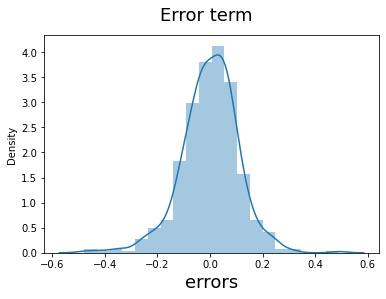

In [91]:
sns.distplot((res),bins=20)
plt.suptitle('Error term\n',fontsize=18)
plt.xlabel('errors',fontsize=18);

In [92]:
x_train_rfe5.columns

Index([                                   'const',
                                             'yr',
                                        'holiday',
                                         'spring',
                                                3,
                                                5,
                                                6,
                                                8,
                                                9,
       'Light_Rain_Thunderstorm_Scattered clouds',
                                    'Mist_Cloudy'],
      dtype='object')

In [93]:
print(x_train_rfe5.shape)
print(res.shape)

(510, 11)
(510,)


- Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

###  Applying the scaling on test set
### Making prediction and Evaluation using the final Model

In [94]:
num_vars=['atemp', 'hum', 'windspeed', 'cnt']

In [95]:
df_test[num_vars]=scaler.transform(df_test[num_vars])# we can use transform as we can not fit the test model

In [96]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Light_Rain_Thunderstorm_Scattered clouds,Mist_Cloudy,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,1,0,1,0,0,0,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [97]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Light_Rain_Thunderstorm_Scattered clouds,Mist_Cloudy,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.072727,0.086364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.260281,0.281541,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
# dividing x_test and y_test same as we did in train set
y_test=df_test.pop('cnt')
x_test=df_test

In [99]:
x_train_new=x_train_rfe5.drop(['const'],axis=1)

In [100]:
x_test_new=x_test[x_train_new.columns]
x_test_new=sm.add_constant(x_test_new)

In [101]:
x_train_rfe5.columns

Index([                                   'const',
                                             'yr',
                                        'holiday',
                                         'spring',
                                                3,
                                                5,
                                                6,
                                                8,
                                                9,
       'Light_Rain_Thunderstorm_Scattered clouds',
                                    'Mist_Cloudy'],
      dtype='object')

### Model prediction

In [102]:
y_test_pred=lm5.predict(x_test_new)

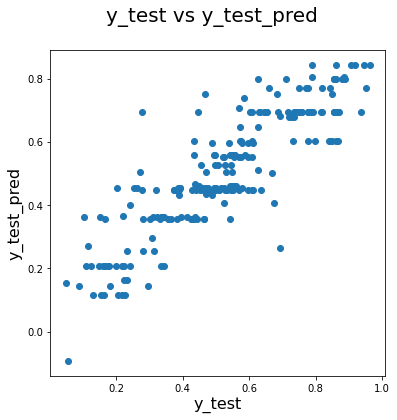

In [103]:
plt.figure(figsize=[6,6])
plt.scatter(y_test,y_test_pred)

plt.suptitle('y_test vs y_test_pred\n',fontsize=20)
plt.xlabel('y_test',fontsize=16)
plt.ylabel('y_test_pred',fontsize=16);

### So we have model that seems good enough to predict the demand of bikes. The actual and predicted cnt are overlaped and indicating that model is able to explain the data

In [104]:
r2=r2_score(y_test,y_test_pred)#r-square of y_test and predicted test
r2

0.745550642831067

In [105]:
np.sqrt(mean_squared_error(y_test,y_test_pred))#returning  mean square error we take sqrt

0.11030100944311462

In [106]:
print(x_train_rfe5.columns)
print(lm5.summary())

Index([                                   'const',
                                             'yr',
                                        'holiday',
                                         'spring',
                                                3,
                                                5,
                                                6,
                                                8,
                                                9,
       'Light_Rain_Thunderstorm_Scattered clouds',
                                    'Mist_Cloudy'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.6
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.87e-149
Time:                

We can see that the equation of our best fitted line is:

$ cnt = 0.246*yr-0.910*holiday-0.239*spring+0.454*3+0.774*5+0.1038*6+0.1099*8+0.1495*9-0.3029*Light_Rain_Thunderstorm_Scattered clouds-0.0925*Mist_Cloudy $

- We see that Bike demand mainly depends on the below variable
- yr,holiday,spring,3,5,6,8,9,Light_Rain_Thunderstorm_Scattered clouds,mist_cloudy

- Demand increase in the month 3,5,6,8,9 only and decreases in holiday spring,Light_Rain_Thunderstorm_Scattered clouds,mist_cloudy

